In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from preprocessing import initiation, quality_check, cleaning_the_soup

In [2]:
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython


***
# Single-cell RNA sequencing data analysis of primary tumor from a breast cancer patient
***

Presented by: Sunaina (Intern)

# Background for why we are interested in scRNAseq:


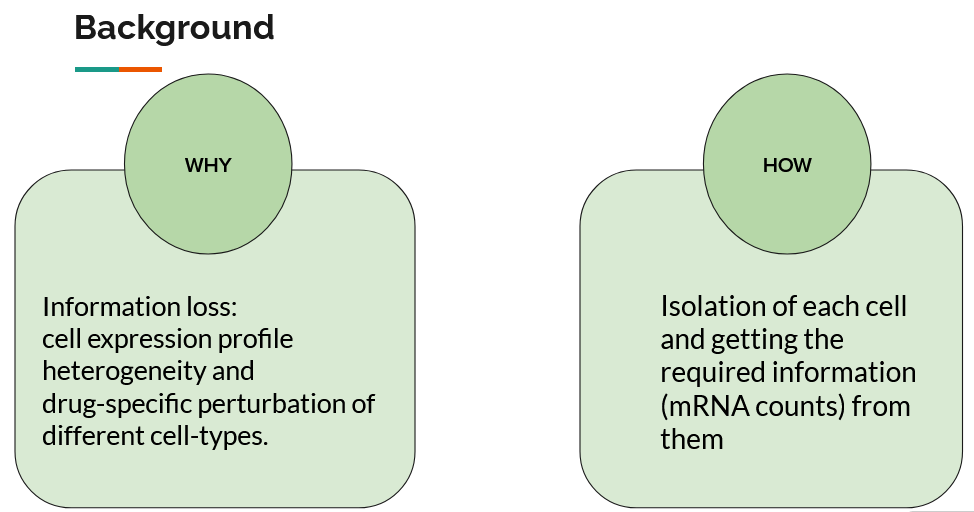
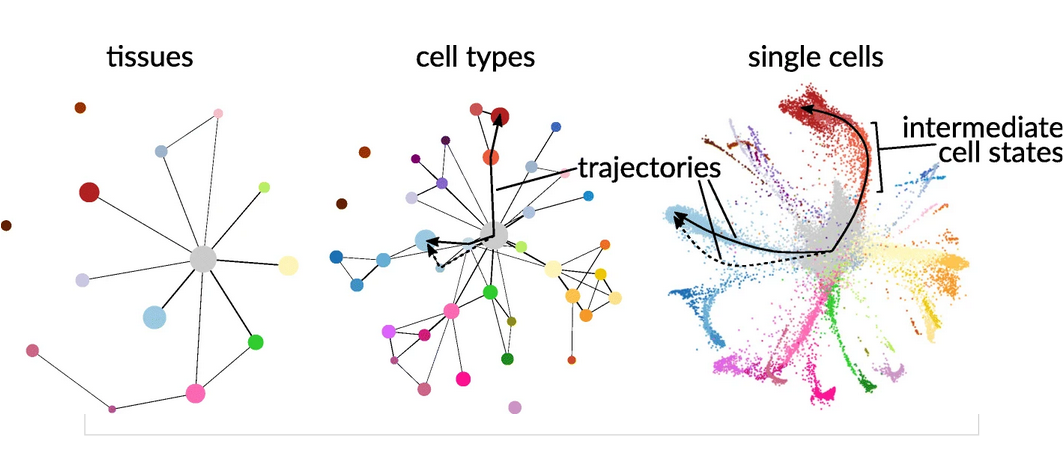

#### General issues in the analysis: 

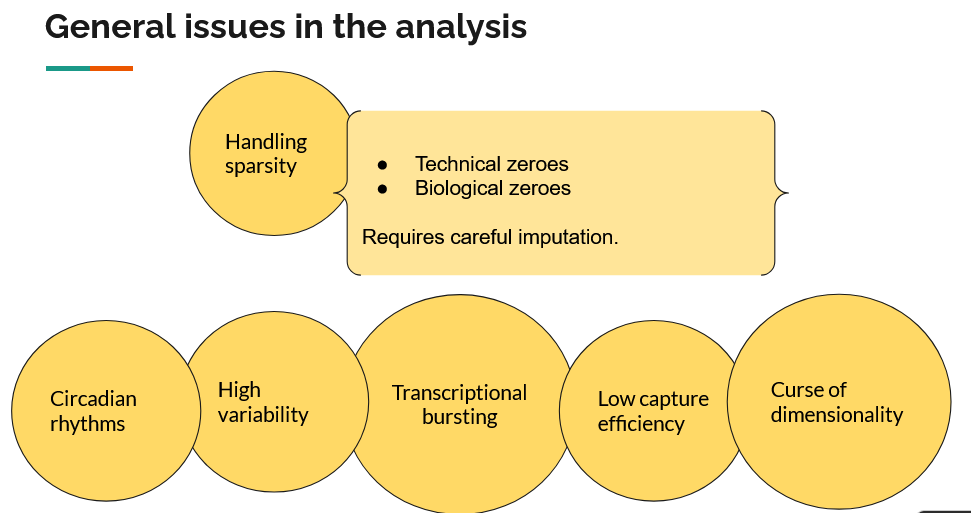

In [3]:
%%R
x <- "test-check for R"
x

[1] "test-check for R"


Uncomment to install SoupX if it is not already installed.

In [6]:
%%R
.libPaths()

[1] "/home/digemed/R/x86_64-pc-linux-gnu-library/4.3"
[2] "/usr/local/lib/R/site-library"                  
[3] "/usr/lib/R/site-library"                        
[4] "/usr/lib/R/library"                             


In [7]:
%%R
# install.packages("SoupX")
# options("install.lock"=FALSE)
library(SoupX)
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:


 [1] LC_CTYPE=en_IN       LC_NUMERIC=C         LC_TIME=en_IN       
 [4] LC_COLLATE=en_IN     LC_MONETARY=en_IN    LC_MESSAGES=en_IN   
 [7] LC_PAPER=en_IN       LC_NAME=C            LC_ADDRESS=C        
[10] LC_TELEPHONE=C       LC_MEASUREMENT=en_IN LC_IDENTIFICATION=C 

time zone: Asia/Kolkata
tzcode source: system (glibc)

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] SoupX_1.6.2

loaded via a namespace (and not attached):
  [1] deldir_1.0-9           pbapply_1.7-2          gridExtra_2.3         
  [4] rlang_1.1.1            magrittr_2.0.3         RcppAnnoy_0.0.21      
  [7] matrixStats_1.0.0      ggridges_0.5.4         compiler_4.3.1        
 [10] spatstat.geom_3.2-2    png_0.1-8              vctrs_0.6.3           
 [13] reshape2_1.4.4         stringr_1.5.0          pkgconfig_2.0.3       
 [16] fastmap_1.1.1          ellipsis_0.3.2         utf8_1.2.3            
 [19] promises_1.2.0.1  

## Terms associated with single-cell RNAseq:

- Barcoded beads: Barcoded with oligonucleotides that are uniquely barcoded for that bead
- Droplets: Contain both beads and cell
- UMIs: connected with the barcoded beads along with the oligonucleotides
- Cell: RNA from the lysed cell anneal with the oligonucleotides (containing both barcode and UMI) of the barcoded beads. Further this RNA is reverse-transcribed to cDNA and this cDNA now contains in addition to the actual cDNA the reverse transcribed regions of the oligonucleotides (barcode + UMI).

### Principle: 

Principle of single-cell RNA sequencing technology:

Gel  beads are associated with barcoded oligonucleotides that consist of:
Sequencing adapters and primers
A 14 bp barcode drawn from 7,50,000 designed sequences to barcode the gel beads
A 10 bp random sequence to index molecules (unique molecular identifier, UMI) [added before the PCR amplification]
30 bp oligo-dT to prime polyadenylated RNA transcripts (to remove rRNAs)

After a gel bead and a cell is encapsulated by a droplet, cell lysis begins. Gel beads dissolve and release their barcoded oligonucleotides for reverse transcription of poly-A mRNAs. Each resulting cDNA molecule contains a UMI and barcode.

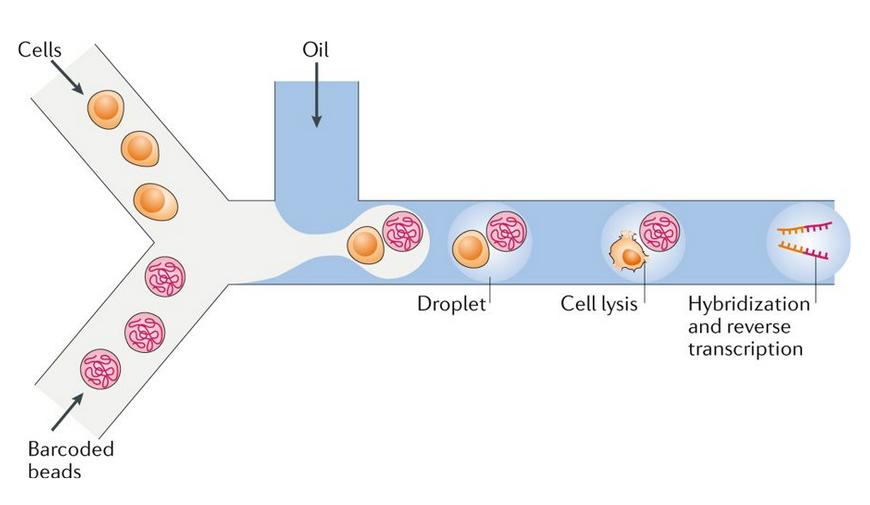

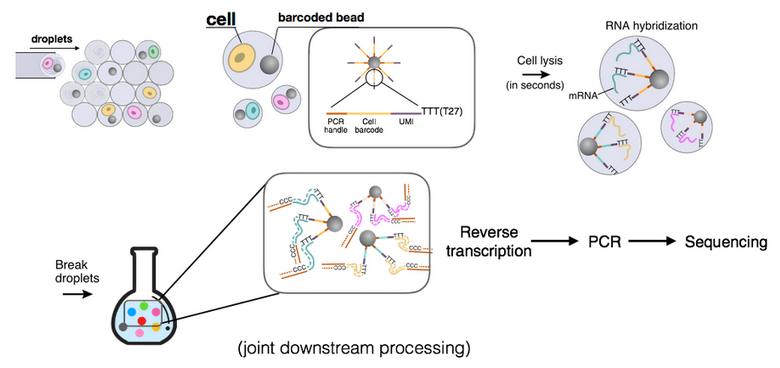

How the counts are calculated: 

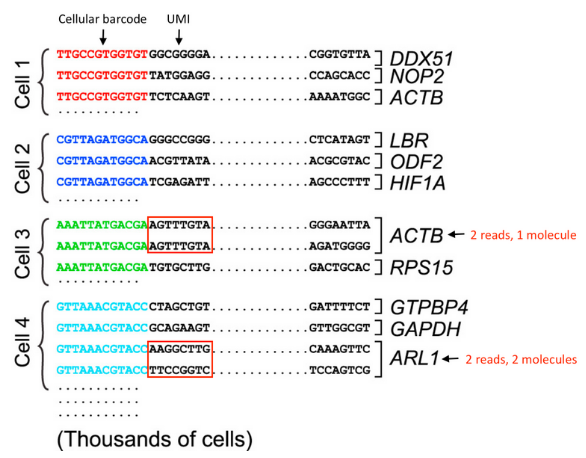

### Workflow for the data analysis: 

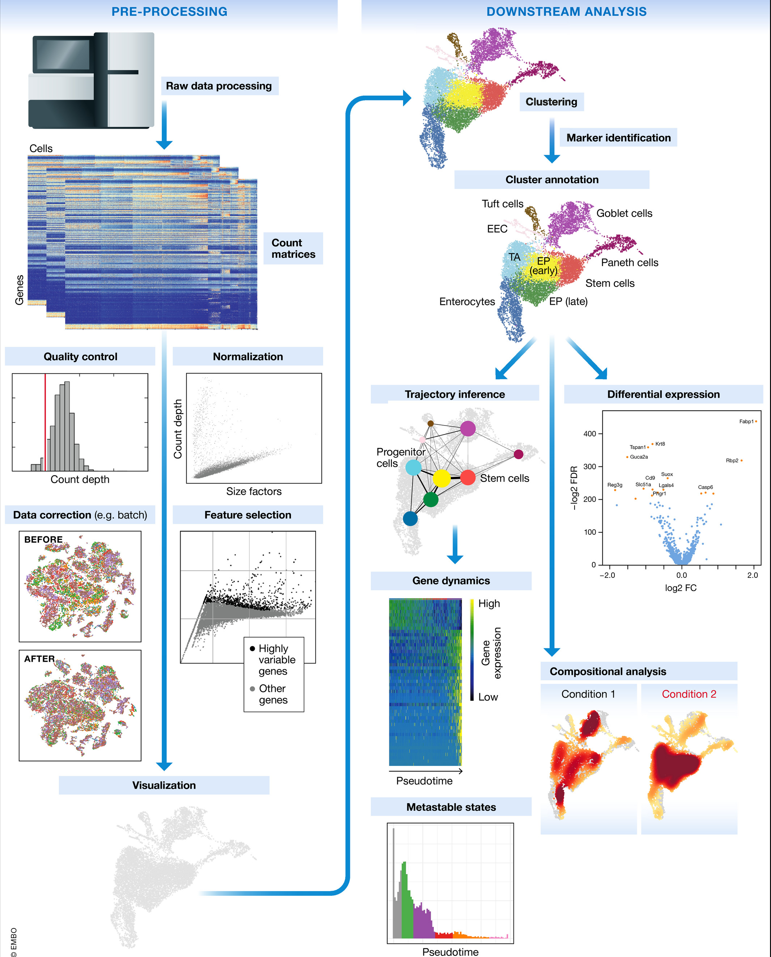

### Study used:

![2023-06-15 02_13_55-Lab presentation - 01 - Google Slides — Mozilla Firefox.png](<attachment:2023-06-15 02_13_55-Lab presentation - 01 - Google Slides — Mozilla Firefox.png>)

### cellranger pipeline

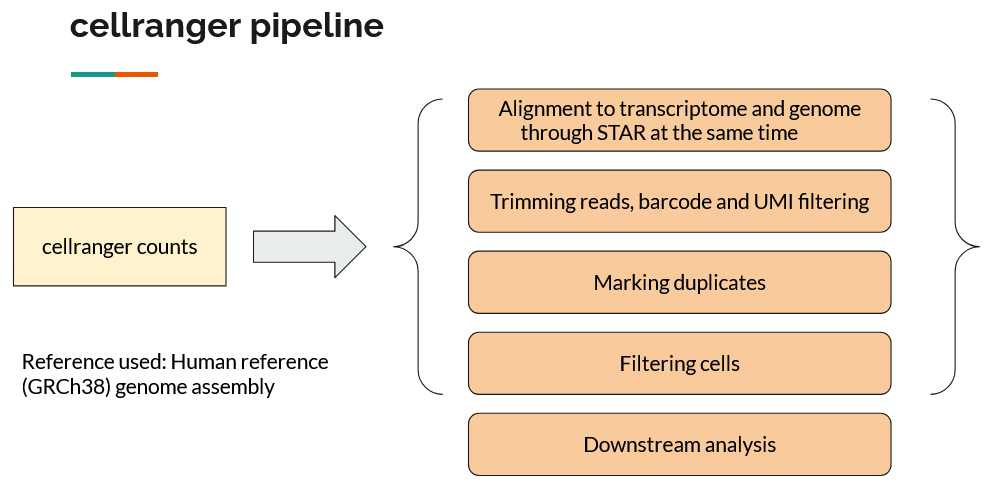
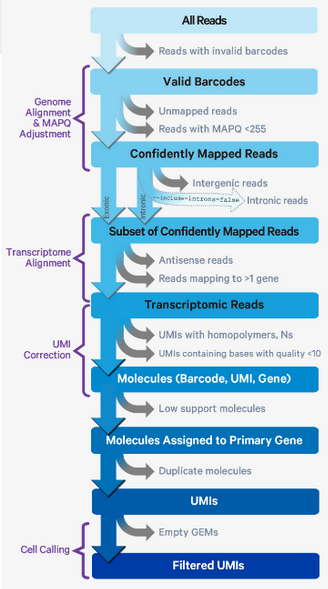

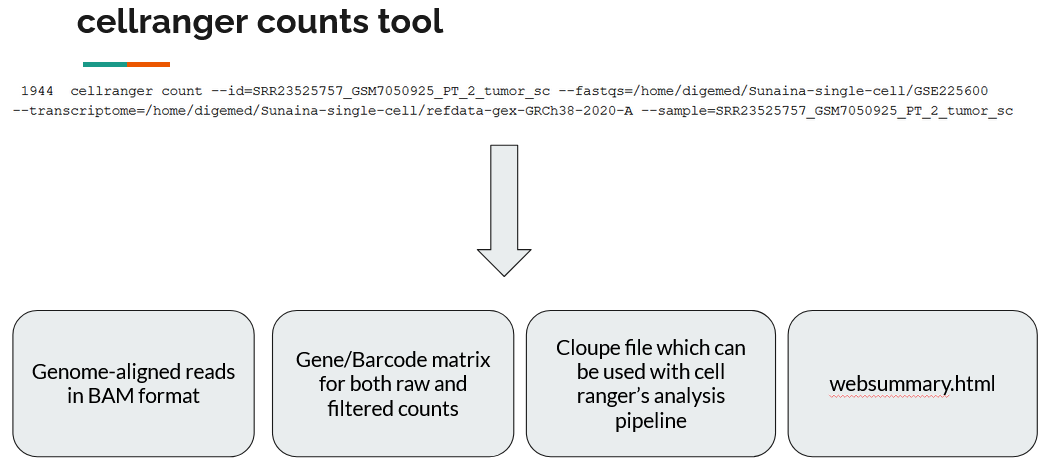
### cellranger QC report

![cell ranger-qc1.png](<attachment:cell ranger-qc1.png>)
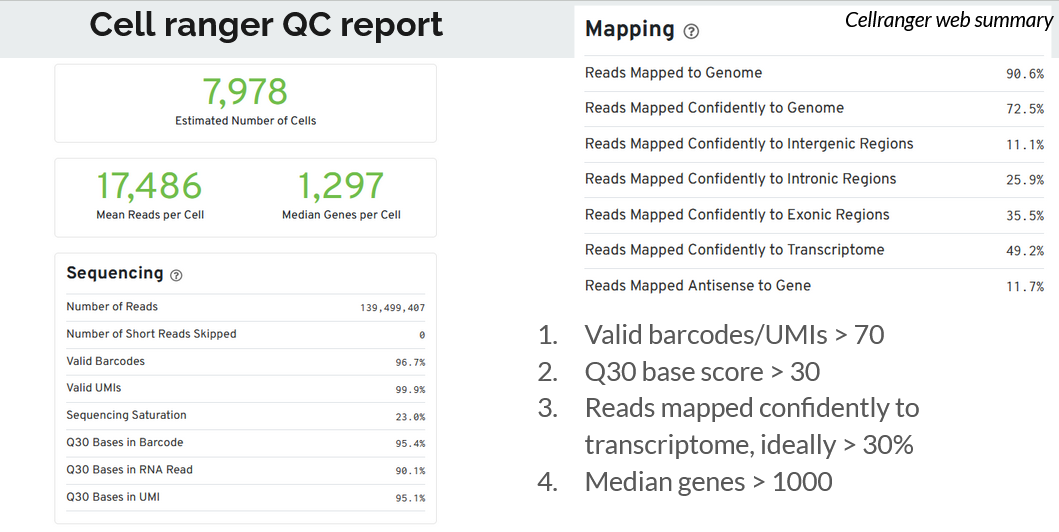
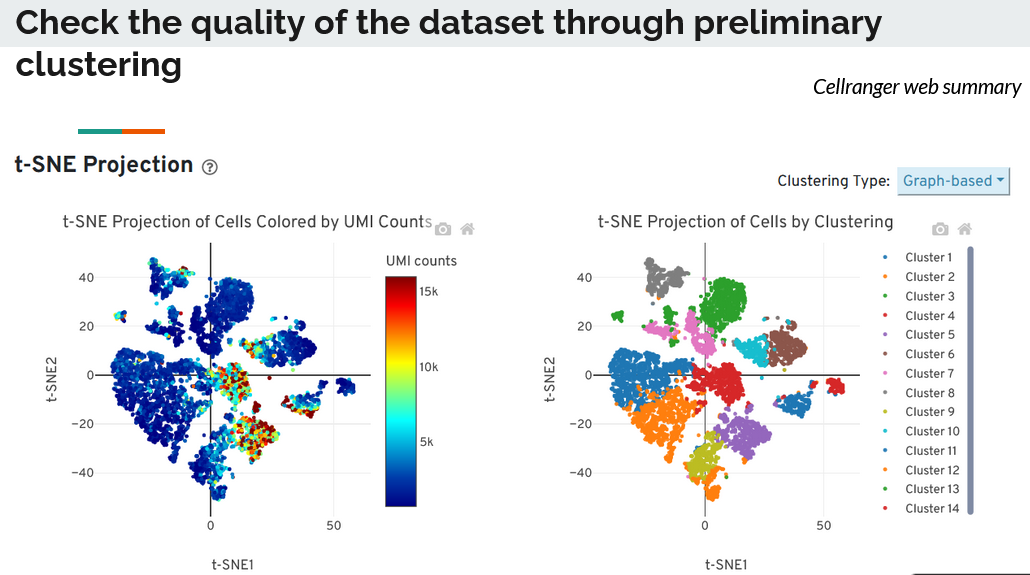
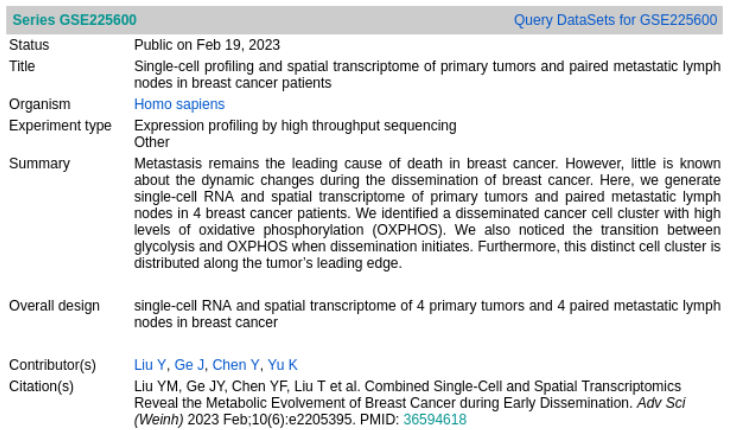
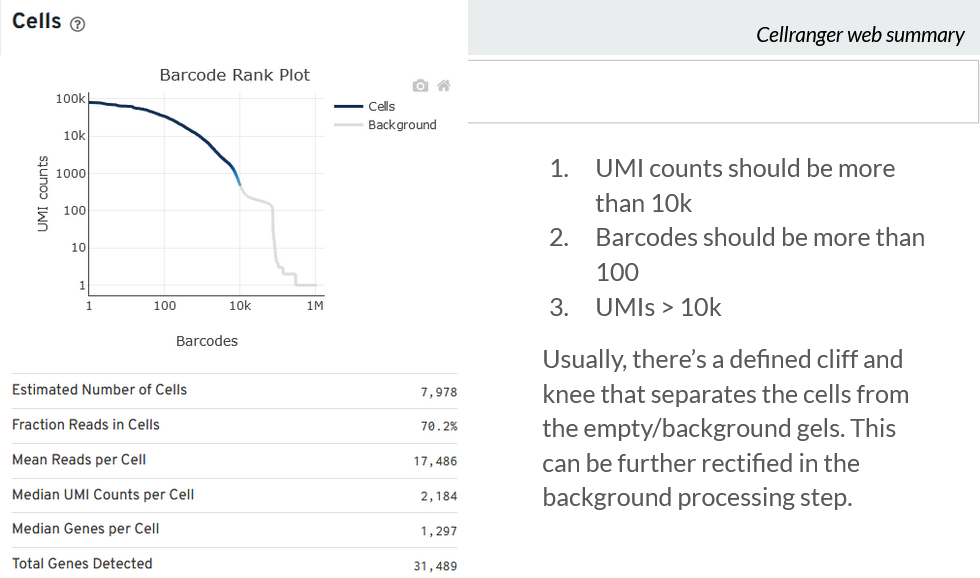

Additionally, you can see the fastqc report of the aligned file:

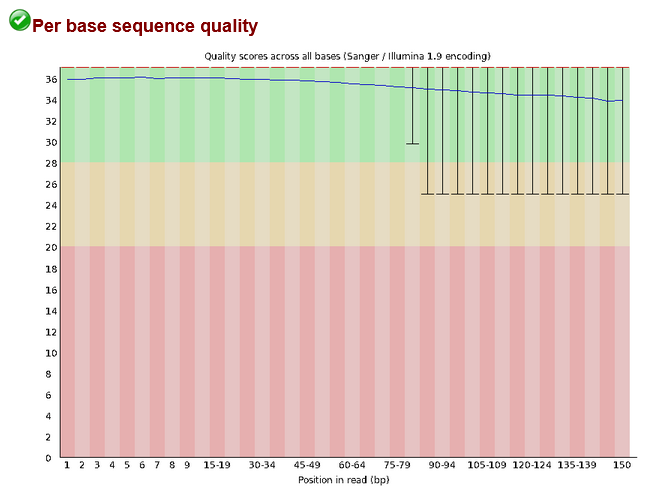
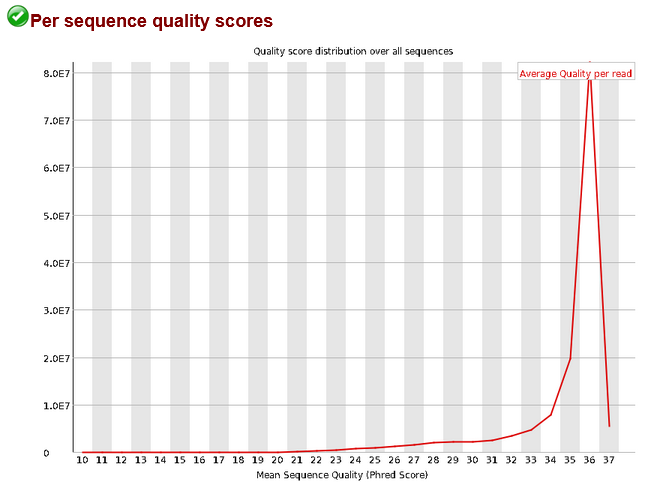

- Certain things are different for scRNA-seq fastqc report and is not usually used for QC metrics since many of the pipelines like cellranger, dropseq or others already include QC metrics with regards to everything. For single-cell data, it is not uncommon to see fluctuations at the start of the lines because the first bases of reads represent the sequence of the priming sites, which may not be perfectly random

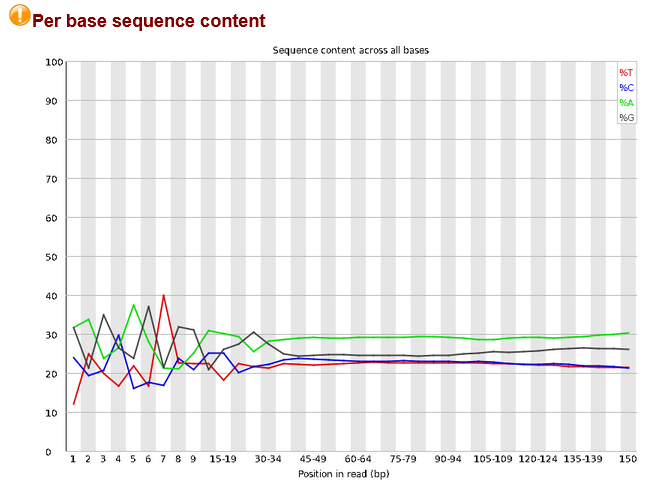

- As most single-cell platform requires multiple rounds of PCR, highly expressed genes usually express a large number of transcripts, and FastQC itself is not UMI aware, it is common that a small subset of sequences may have a large number of duplications. 

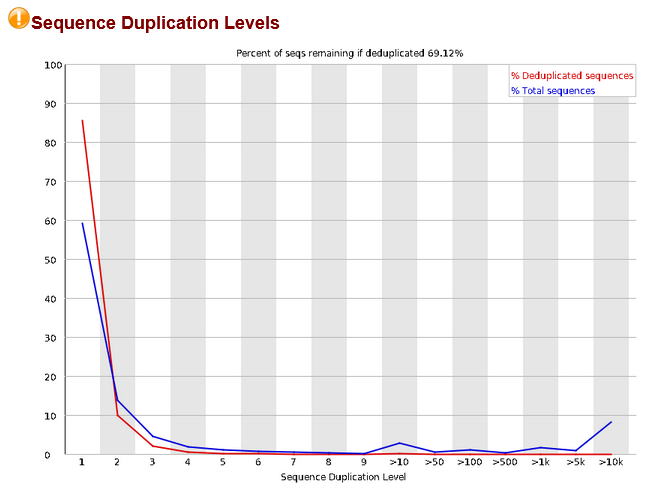



## A brief overview of the annData data object:

- Highly usable for the kind of data that -omics technology produces. You can add "attributes" to both observations (cellular barcodes) and variables (genes). 
- You can add "embeddings" to the raw data layer -- these embeddings won't change the raw data but can be selected whenever required.

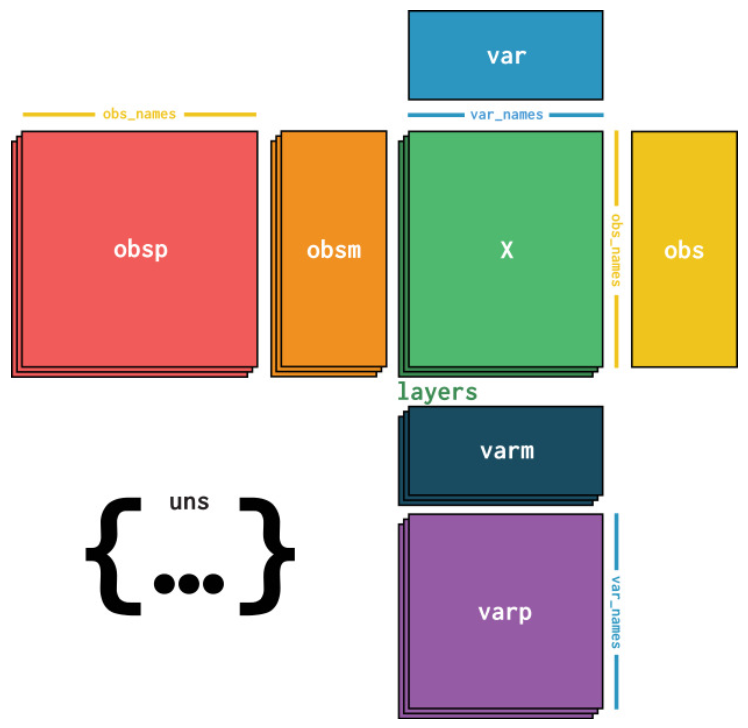

## Different usages of scRNA-seq technology: 

- Identifying cellular structure in your sample
- Inferring "trajectories" of each cell type
- Differential gene expression
- Compositional analysis
- Perturbation modelling

## Processed raw data

1. Barcodes: 

![2023-06-14 12_37_25-barcodes.tsv - Notepad.png](<attachment:2023-06-14 12_37_25-barcodes.tsv - Notepad.png>)

2. Features (Genes mapped):

![2023-06-14 12_38_08-features.tsv - Notepad.png](<attachment:2023-06-14 12_38_08-features.tsv - Notepad.png>)

3. Sparse matrix showing the total number of barcodes, features and sum of counts. In this matrix, the first column corresponds to the "feature" number from the previous file, the second column corresponds to "Barcode 1, Barcode 2 and so on", whereas the third column corresponds to the counts : 

![2023-06-14 12_38_54-matrix.mtx - Notepad.png](<attachment:2023-06-14 12_38_54-matrix.mtx - Notepad.png>)
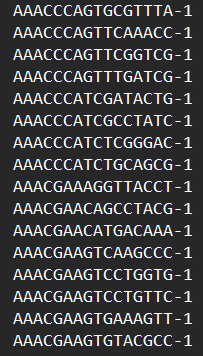
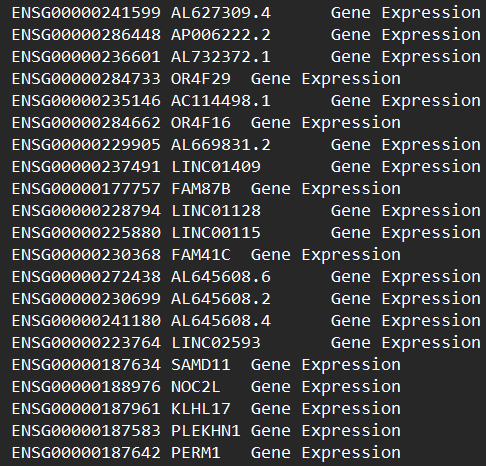
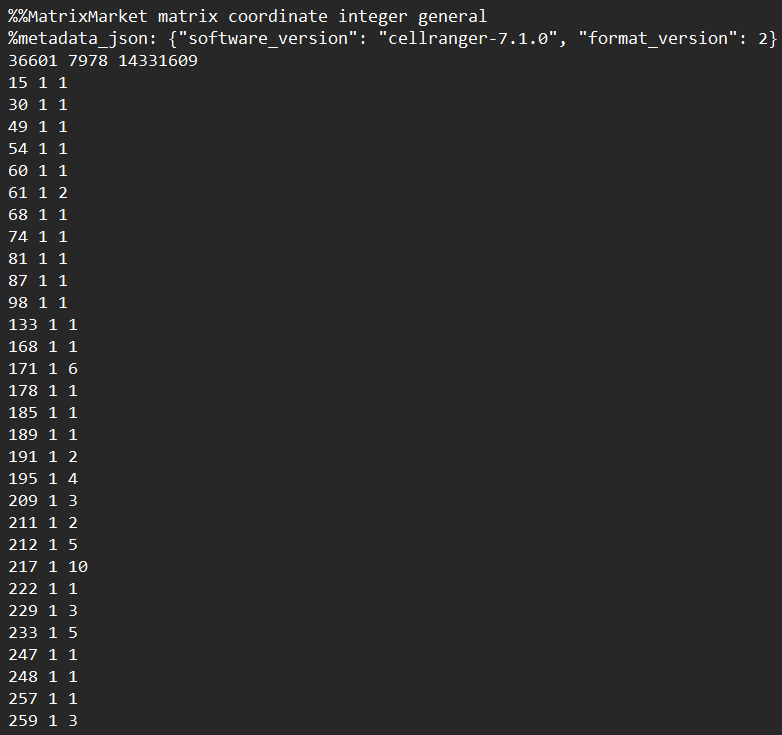

Give the input for each sample in "in_dir".

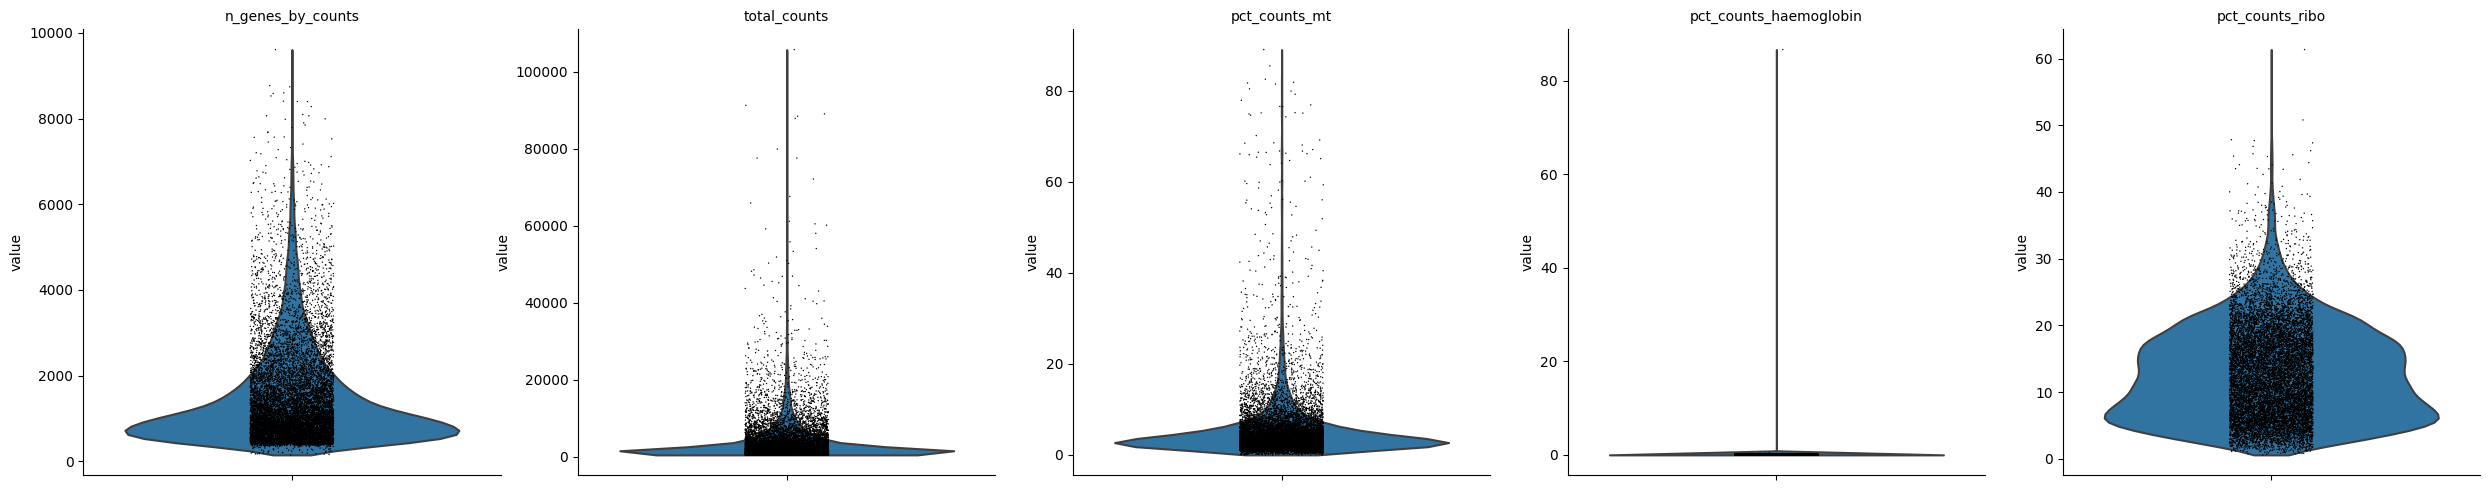

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


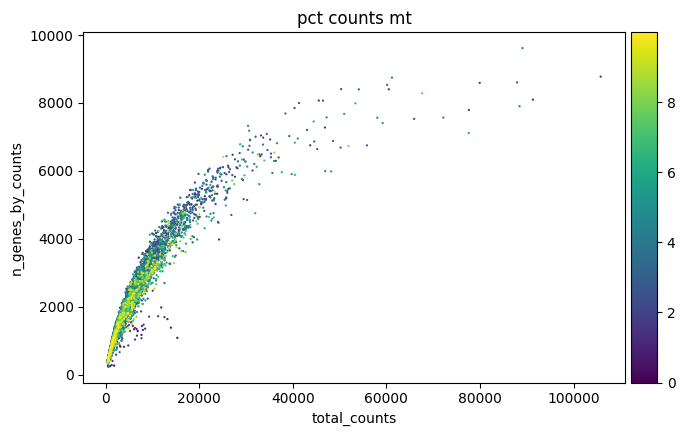

AnnData object with n_obs × n_vars = 11330 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_haemoglobin', 'log1p_total_counts_haemoglobin', 'pct_counts_haemoglobin', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'haemoglobin', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [8]:
import gzip

in_dir = "/home/digemed/Sunaina-single-cell/GSE225600/primary tumor/SRR23525754_GSM7050928_PT_7_tumor_sc_S2/outs/" 

in_dir_mtx = in_dir + "filtered_feature_bc_matrix/"
feature_dir = in_dir_mtx + "features.tsv.gz"
with gzip.open(feature_dir) as f:
    features = pd.read_csv(f, sep= "\t", header=None)

int_data = initiation(in_dir_mtx, features)
adata = quality_check(int_data)

raw_dir = in_dir + "raw_feature_bc_matrix/"
data, data_raw, genes, cells, soupx_groups = cleaning_the_soup(adata, raw_dir)

adata



Test-check: The number of genes should be same in both raw_adata and filtered_adata

In [9]:
data.shape[0] == data_raw.shape[0]

True

In [10]:
adata.to_df()

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACCCAAGGGTATAT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAAGTCATGCT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAAGTCTCTGA-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACACATGTTG-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACATGCCGCA-1          0.0      0.0    0.0         0.0         0.0   
...                         ...      ...    ...         ...         ...   
TTTGTTGTCCATCCGT-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGTCCGTGTAA-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGTCGTGCACG-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGTCTCTGCCA-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGTCTGGGATT-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACCCAAGGGTATAT-1         0.0         0.0         0.0         0.0   
AAACCCAAGTCATGCT-1         0.0         0.0         0.0         0.0   
AAACCCAAGTCTCTGA-1         0.0         0.0         0.0         0.0   
AAACCCACACATGTTG-1         0.0         0.0         0.0         0.0   
AAACCCACATGCCGCA-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGTTGTCCATCCGT-1         0.0         0.0         0.0         0.0   
TTTGTTGTCCGTGTAA-1         0.0         0.0         0.0         0.0   
TTTGTTGTCGTGCACG-1         0.0         0.0         0.0         0.0   
TTTGTTGTCTCTGCCA-1         0.0         0.0         0.0         0.0   
TTTGTTGTCTGGGATT-1         0.0         0.0         0.0         0.0   

                    AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACCCAAGGGTATAT-1         0.0  ...         0.0         0.0         0.0   
AAACCCAAGTCATGCT-1         0.0  ...         0.0         0.0         0.0   
AAACCCAAGTCTCTGA-1         0.0  ...         0.0         0.0         0.0   
AAACCCACACATGTTG-1         0.0  ...         0.0         0.0         0.0   
AAACCCACATGCCGCA-1         0.0  ...         0.0         0.0         0.0   
...                        ...  ...         ...         ...         ...   
TTTGTTGTCCATCCGT-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGTCCGTGTAA-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGTCGTGCACG-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGTCTCTGCCA-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGTCTGGGATT-1         0.0  ...         0.0         0.0         0.0   

                    AC136616.3  AC136616.2  AC141272.1  AC023491.2  \
AAACCCAAGGGTATAT-1         0.0         0.0         0.0         0.0   
AAACCCAAGTCATGCT-1         0.0         0.0         0.0         0.0   
AAACCCAAGTCTCTGA-1         0.0         0.0         0.0         0.0   
AAACCCACACATGTTG-1         0.0         0.0         0.0         0.0   
AAACCCACATGCCGCA-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGTTGTCCATCCGT-1         0.0         0.0         0.0         0.0   
TTTGTTGTCCGTGTAA-1         0.0         0.0         0.0         0.0   
TTTGTTGTCGTGCACG-1         0.0         0.0         0.0         0.0   
TTTGTTGTCTCTGCCA-1         0.0         0.0         0.0         0.0   
TTTGTTGTCTGGGATT-1         0.0         0.0         0.0         0.0   

                    AC007325.1  AC007325.4  AC007325.2  
AAACCCAAGGGTATAT-1         0.0         0.0         0.0  
AAACCCAAGTCATGCT-1         0.0         0.0         0.0  
AAACCCAAGTCTCTGA-1         0.0         0.0         0.0  
AAACCCACACATGTTG-1         0.0         0.0         0.0  
AAACCCACATGCCGCA-1         0.0         0.0         0.0  
...                        ...         ...         ...  
TTTGTTGTCCATCCGT-1         0.0         0.0         0.0  
TTTGTTGTCCGTGTAA-1         0.0         0.0         0.0  
TTTGTTGTCGTGCACG-1     

In [11]:
adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGGGTATAT-1               1352                 7.210080        2421.0   
AAACCCAAGTCATGCT-1               2806                 7.939872        7747.0   
AAACCCAAGTCTCTGA-1               2893                 7.970395        8945.0   
AAACCCACACATGTTG-1               2987                 8.002360        8701.0   
AAACCCACATGCCGCA-1                741                 6.609349        1023.0   
...                               ...                      ...           ...   
TTTGTTGTCCATCCGT-1                855                 6.752270        1262.0   
TTTGTTGTCCGTGTAA-1                905                 6.809039        1424.0   
TTTGTTGTCGTGCACG-1               1278                 7.153834        2025.0   
TTTGTTGTCTCTGCCA-1               1085                 6.990257        1958.0   
TTTGTTGTCTGGGATT-1                800                 6.685861        1428.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGGGTATAT-1            7.792349                   19.000413   
AAACCCAAGTCATGCT-1            8.955190                   14.186137   
AAACCCAAGTCTCTGA-1            9.098962                   17.395193   
AAACCCACACATGTTG-1            9.071308                   20.721756   
AAACCCACATGCCGCA-1            6.931472                   17.204301   
...                                ...                         ...   
TTTGTTGTCCATCCGT-1            7.141245                   18.621236   
TTTGTTGTCCGTGTAA-1            7.261927                   17.696629   
TTTGTTGTCGTGCACG-1            7.613819                   14.962963   
TTTGTTGTCTCTGCCA-1            7.580189                   16.649642   
TTTGTTGTCTGGGATT-1            7.264730                   19.817927   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGGGTATAT-1            148.0               5.003946       6.113176   
AAACCCAAGTCATGCT-1            163.0               5.099866       2.104040   
AAACCCAAGTCTCTGA-1            157.0               5.062595       1.755171   
AAACCCACACATGTTG-1            666.0               6.502790       7.654293   
AAACCCACATGCCGCA-1             48.0               3.891820       4.692082   
...                             ...                    ...            ...   
TTTGTTGTCCATCCGT-1             41.0               3.737670       3.248811   
TTTGTTGTCCGTGTAA-1             98.0               4.595120       6.882022   
TTTGTTGTCGTGCACG-1             10.0               2.397895       0.493827   
TTTGTTGTCTCTGCCA-1             28.0               3.367296       1.430031   
TTTGTTGTCTGGGATT-1             62.0               4.143135       4.341737   

                    total_counts_ribo  log1p_total_counts_ribo  \
AAACCCAAGGGTATAT-1              287.0                 5.662961   
AAACCCAAGTCATGCT-1             1369.0                 7.222566   
AAACCCAAGTCTCTGA-1             1261.0                 7.140453   
AAACCCACACATGTTG-1              200.0                 5.303305   
AAACCCACATGCCGCA-1               88.0                 4.488636   
...                               ...                      ...   
TTTGTTGTCCATCCGT-1              148.0                 5.003946   
TTTGTTGTCCGTGTAA-1               88.0                 4.488636   
TTTGTTGTCGTGCACG-1               34.0                 3.555348   
TTTGTTGTCTCTGCCA-1              341.0                 5.834811   
TTTGTTGTCTGGGATT-1              237.0                 5.472270   

                    pct_counts_ribo  total_counts_haemoglobin  \
AAACCCAAGGGTATAT-1        11.854606                       0.0   
AAACCCAAGTCATGCT-1        17.671356                       1.0   
AAACCCAAGTCTCTGA-1        14.097261                       0.0   
AAACCCACACATGTTG-1         2.298586                       2.0   
AAACCCACATGCCGCA-1         8.602151                       0.0   
...                             ...                       ...   
TTTGTTGTCCATCCGT-1        11.727417          

Quality check of the cellular covariates:
- n_genes_by_counts in .obs is the number of genes with positive counts in a cell,

- total_counts is the total number of counts for a cell, this might also be known as library size, and

- pct_counts_mt is the proportion of total counts for a cell which are mitochondrial.


### SoupX : removing ambient mRNA 

Two types of mRNA are present in any single-cell RNA sequencing experiment. Within each droplet, ideally there is one cell which is lysed and the mRNAs released are annealed to the oligonucleotides. But since we are suspending the cells in a suspension medium, due to stress or other issues, cells may release ambient RNA. Contamination rate, even in highly controlled experiments is around 1 %. Thus, there is a need to remove it. Following steps are used to clean this using the SoupX library.

1. Empty droplets are used to measure the concentration of ambient mRNA.
2. A contamination fraction is estimated : based on the fraction of UMIs that are present in the background.
3. Correct the expression of each cell using the ambient mRNA expression profile. 

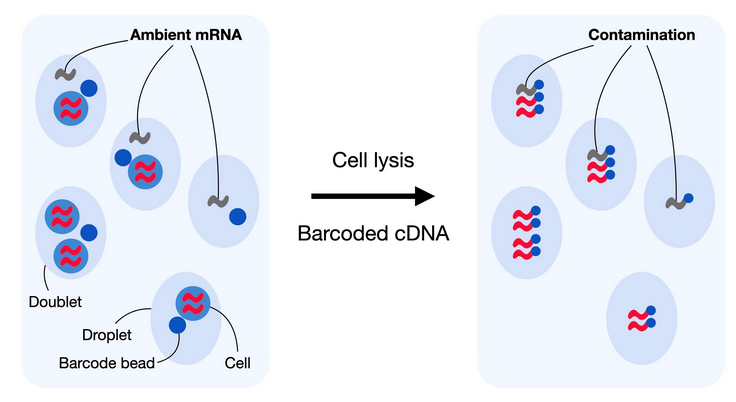
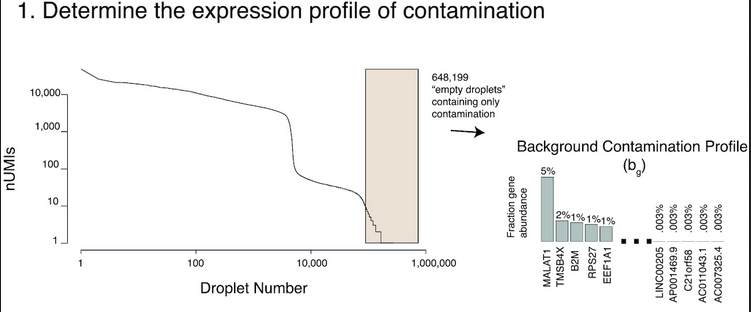
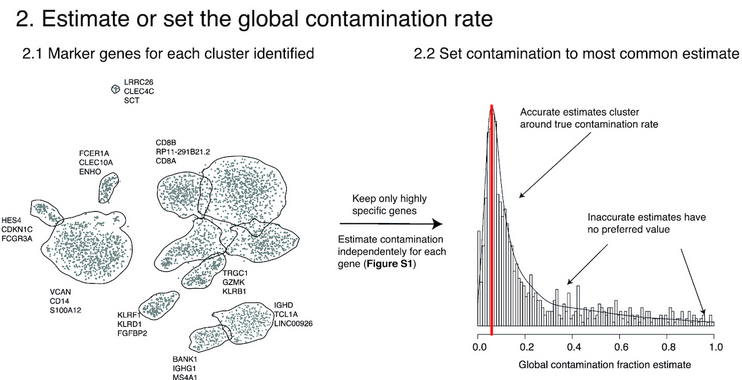
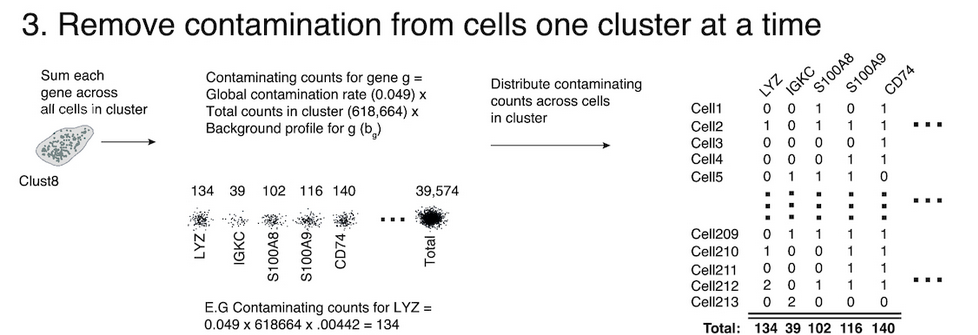

### Make sure the version of rpy2 is 3.5.8 or else the kernel crashes when using R libraries.

In [12]:
import rpy2
print(rpy2.__version__)

3.5.8


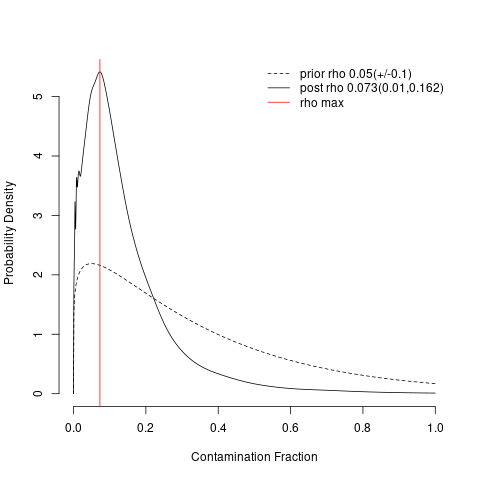

In [13]:
%%R -i data -i data_raw -i genes -i cells -i soupx_groups -o out -o soupx_channel

# specify row and column names of data
rownames(data) = genes
colnames(data) = cells

# ensure correct sparse format for table of counts and table of droplets from Python data object
data <- as(data, "sparseMatrix")
data_tod <- as(data_raw, "sparseMatrix")

# Generate SoupChannel Object for SoupX to calculate the 
soupx_channel = SoupChannel(data_raw, data, calcSoupProfile = FALSE)

# Add extra meta data to the SoupChannel object
soupProf = data.frame(row.names = rownames(data), est = rowSums(data)/sum(data), counts = rowSums(data))
soupx_channel = setSoupProfile(soupx_channel, soupProf)
# Set cluster information in SoupChannel
soupx_channel = setClusters(soupx_channel, soupx_groups)

# Estimate contamination fraction
soupx_channel  = autoEstCont(soupx_channel)
# Infer corrected table of counts and rount to integer
out = adjustCounts(soupx_channel, roundToInt = TRUE)


rho is the contamination fraction present in the data. Initially, when 5k cells were there, the fraction was 0.04%. And , for 3k filtered cells, it is 0.22%. To give a scale, a contamination fraction of more than 1 % is considered bad for the dataset.

In [14]:
adata.layers["counts"] = adata.X
adata.layers["soupX_counts"] = out.transpose()
adata.X = adata.layers["soupX_counts"] # overwriting X for soupX_counts since we only want to work with the corrected counts
adata

AnnData object with n_obs × n_vars = 11330 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_haemoglobin', 'log1p_total_counts_haemoglobin', 'pct_counts_haemoglobin', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'haemoglobin', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'counts', 'soupX_counts'

#### Make sure the Matrix package has the most recent version and it should be loaded before the other packages. Otherwise, it gives an error since the packages re-install a lower version of Matrix

In [15]:
%%R


# install.packages("Matrix")
library("Matrix")
packageVersion("Matrix")


[1] ‘1.5.4.1’


#### Install the packages using BiocManager

In [19]:
%%R
# install.packages("Seurat")
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("scater")
# BiocManager::install("scDblFinder")

# install.packages("BiocParallel")

library("Seurat")
library("scater")
library("scDblFinder")
library("BiocParallel")

In [21]:
data_mat = adata.X.T
data_mat.shape[0]

36601

### Finding doublets in the dataset

It is entirely possible for a single droplet to contain two cells with one barcode bead. In that case, the mRNA counts associated with each bead will be the average of the two cells. This will distort the further downstream analysis. Thus, they need to be removed. The scDblFinder package solves this problem by creating artificial doublet droplet and comparing their expression profile with the real droplets present. This produces a score for each cell and classifies the cells based on this score.

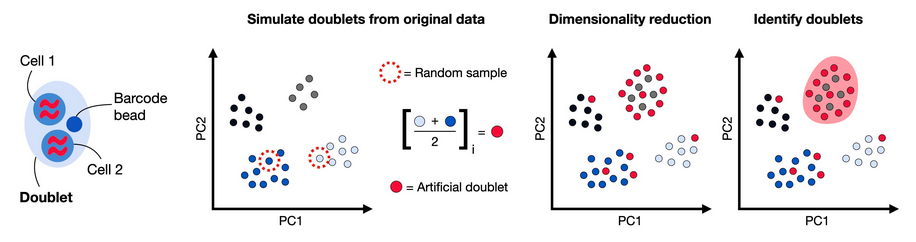

In [22]:
%%R -i data_mat -o doublet_score -o doublet_class

# doublet_class refers to whether it's a single or doublet, this classification is based on averaging two random cells, creating "artificial" doublets and comparing gene expression between these and other cells

sce <- scDblFinder(SingleCellExperiment(list(counts=data_mat),))
doublet_score = sce$scDblFinder.score
doublet_class = sce$scDblFinder.class

In [23]:
adata.obs["scDblFinder_score"] = doublet_score
adata.obs["scDblFinder_class"] = doublet_class

adata.obs.scDblFinder_class.value_counts()

1    9718
2    1612
Name: scDblFinder_class, dtype: int64

In [24]:
sc.pp.filter_genes(adata, min_cells=20) # removing genes that are not present in at least 20 cells


In [25]:
import seaborn as sns

### Log-shift transformation

Highly expressed genes have more variance in their distribution as compared to lowly expressed genes. Due to this difference in variance between different genes among different cells or *heteroskedasticity*, one cannot use standard statistical tools that assume same variance among different variables. To treat this, there are different methods. 

1. Log-shift transformation: 
            $f(y) = \log{}(\frac{y}{s} + y_0)$

where y are the raw counts, $y_0$ is pseudocount that is added such that we don't have to take log of zero and s is a size factor that can be estimated using : 
            $$s = \frac {\sum {y_{g,c}}}{L}$$
            
L can either be median gene counts or $10^6$ to be converted to counts per million (CPM).

Before log-transformation: AAACCCAAGGGTATAT-1    2421.0
AAACCCAAGTCATGCT-1    7747.0
AAACCCAAGTCTCTGA-1    8945.0
AAACCCACACATGTTG-1    8701.0
AAACCCACATGCCGCA-1    1023.0
                       ...  
TTTGTTGTCCATCCGT-1    1262.0
TTTGTTGTCCGTGTAA-1    1424.0
TTTGTTGTCGTGCACG-1    2025.0
TTTGTTGTCTCTGCCA-1    1958.0
TTTGTTGTCTGGGATT-1    1428.0
Name: total_counts, Length: 11330, dtype: float32
After log-shift transformation :AAACCCAAGGGTATAT-1     917.858241
AAACCCAAGTCATGCT-1    1034.484034
AAACCCAAGTCTCTGA-1     977.595178
AAACCCACACATGTTG-1    1018.477429
AAACCCACATGCCGCA-1     799.382878
                         ...     
TTTGTTGTCCATCCGT-1     823.557777
TTTGTTGTCCGTGTAA-1     835.000172
TTTGTTGTCGTGCACG-1     933.777747
TTTGTTGTCTCTGCCA-1     882.387034
TTTGTTGTCTGGGATT-1     776.689422
Length: 11330, dtype: float64


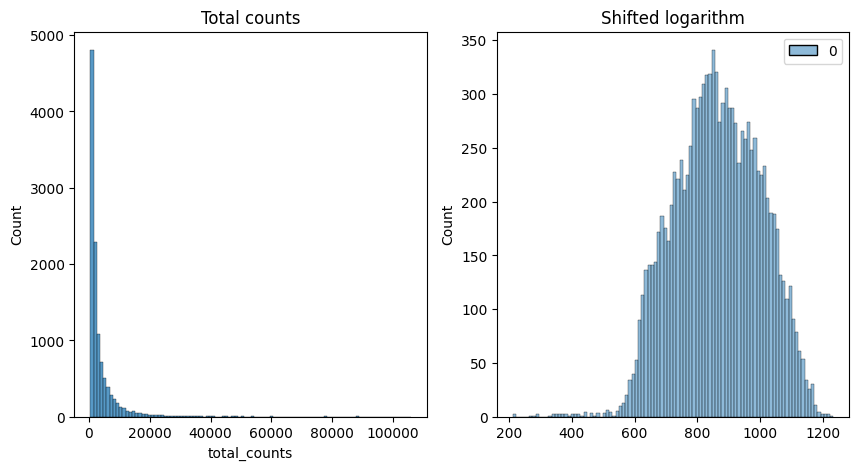

In [26]:
# before normalization 
import matplotlib.pyplot as plt

scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
print(f"Before log-transformation: " + str(adata.obs["total_counts"]))

print("After log-shift transformation :" + str(adata.to_df(layer = "log1p_norm").sum(axis=1)))

p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

2. Analytic Pearson residuals :

The raw counts are being fit to a negative binomial regression.
Pearson's residuals are calculated from that to generate estimates for technical noise. Residuals refer to the difference between the actual and predicted values. Here, s.d. of a binomial distribution is estimated. Pearson's residuals are calculated as: 
                       $$r = \frac{y_{observed} - y_{predicted}}{\sigma} $$
Comparison between different transformations showed that this method removed sampling noise.

Both positive and negative values are present in the output. For positive values, the more counts are observed than expected compared to the gene's expression. And vice versa. 

After Pearson transformation: AAACCCAAGGGTATAT-1     625.294513
AAACCCAAGTCATGCT-1    -775.711672
AAACCCAAGTCTCTGA-1    -337.896116
AAACCCACACATGTTG-1     480.404334
AAACCCACATGCCGCA-1     685.566581
                         ...     
TTTGTTGTCCATCCGT-1     246.386596
TTTGTTGTCCGTGTAA-1    1290.746733
TTTGTTGTCGTGCACG-1    1408.762447
TTTGTTGTCTCTGCCA-1     138.107724
TTTGTTGTCTGGGATT-1    -164.174910
Length: 11330, dtype: float64


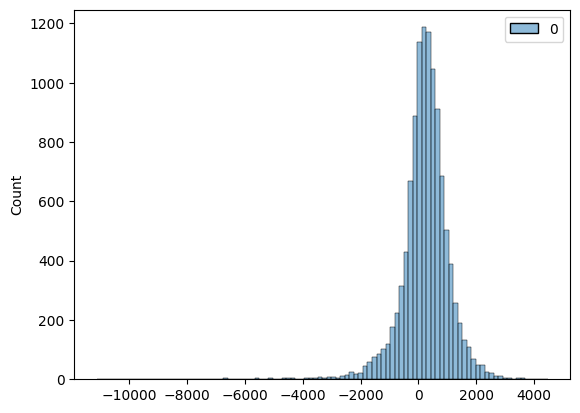

In [28]:
from scipy.sparse import csr_matrix

adata.layers["analytic_pearson_residuals"] = csr_matrix(sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)["X"]) # keep inplace at False since you don't want to add the transformation to the actual data
print("After Pearson transformation: " + str(adata.to_df(layer = "analytic_pearson_residuals").sum(1)))

sns.histplot(adata.layers["analytic_pearson_residuals"].sum(axis=1), bins=100, kde=False)
plt.show()

## 6. Feature selection

1. Highly variable genes: Since scRNA-seq data is concentrated with dropouts (that is -- has too many zeroes since gene expression profile from EACH cell is calculated), informative features (genes) need to be selected. This can be performed by calculating the coefficient of variance for each gene along all the cells : $$ CV = \frac{\sigma}{\mu}$$

or the dispersion: $$ Dispersion = \frac{\sigma^2}{\mu} $$


With the default value of flavor = "Seurat", scanpy outputs the list of highly variable genes by calculating dispersion for each gene and then ranking using dispersion. But these methods expect logarithmized data which may be biased since we are adding arbitrary pseudo-counts to the $\frac{y}{c}$ term as we have observed before. Unclear on how to find highly variable genes for pearson's residuals, using the pre-made functions doesn't really give the appropriate plots.

For log-shift transformation: 


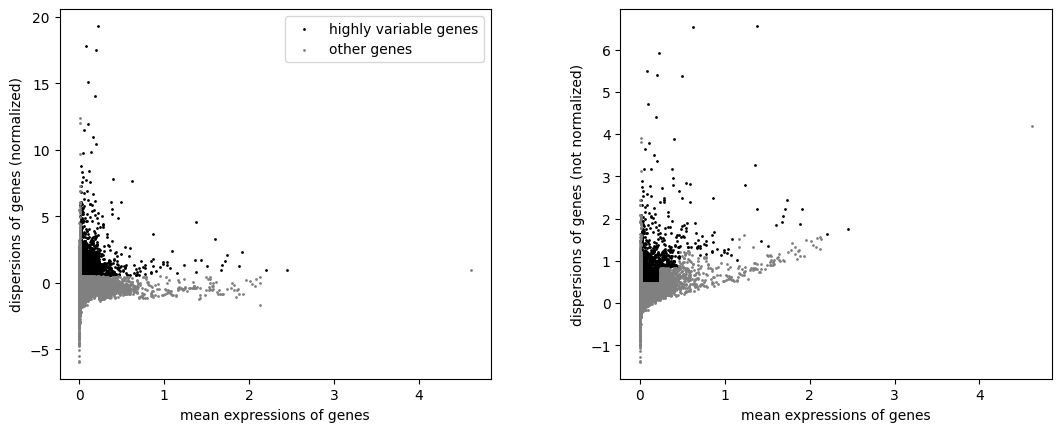

Highly variable genes: 2691


In [29]:
sc.pp.highly_variable_genes(adata, layer="log1p_norm")
print("For log-shift transformation: ")
sc.pl.highly_variable_genes(adata)

# sc.pp.highly_variable_genes(adata, layer="analytic_pearson_residuals")
# print("For analytic pearson residuals: ")
# sc.pl.highly_variable_genes(adata)


# adata.write(in_dir + "S3_adata_normalization.h5ad")

variable_genes = adata.var.highly_variable
print("Highly variable genes: %d"%sum(variable_genes))


In [30]:
adata.var[adata.var["highly_variable"] == True]
sc.pp.highly_variable_genes(
    adata, n_top_genes=2257, flavor="cell_ranger"
)
adata_hvg = adata[:, adata.var["highly_variable"]].copy()



### Feature selection

2. Using deviance: A "null-model" is used to approximate the expression profiles of genes which are constant for different cells. Then, the genes having a high variability will have a higher "deviance". This is again based upon negative binomial distribution assumptions. In fact, deviance residuals are similar to Pearson's residuals.

In [32]:
%%R

# BiocManager::install("scry")
library("scry")

<span style='color:Cyan'> The next cell will have to be re-run if it gives error on the first run. This is due to the initialisation of the annData object. Since these data objects are very huge (2-3 GB at times), it takes a lot of memory to load them up. When using rpy2, at times, it seemingly breaks up if the size is large. To prevent this, just re-run the cell. Since Jupyter notebook saves the previous outputs, this speeds up the process and it is able to load the whole object. </span>

In [33]:
#Converting the python annData object directly to R's since it directly works with raw counts
# adata = sc.read(filename="adata_normalization.h5ad")
ro.globalenv["adata"] = adata

In [34]:
%%R 
sce = devianceFeatureSelection(adata, assay="X")

In [37]:
# Converting the R object to python again

deviance = ro.r("rowData(sce)$binomial_deviance").T
adata.var["deviance"] = deviance

top_4000 = adata.var["deviance"].sort_values(ascending=False)

# adata.var["highly_deviant"] = mask

adata_top_4000 = adata[:, list(top_4000.index)]
# arbitarily taking the top 4000 number of genes 
adata_top_4000

View of AnnData object with n_obs × n_vars = 11330 × 20095
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_haemoglobin', 'log1p_total_counts_haemoglobin', 'pct_counts_haemoglobin', 'n_genes', 'scDblFinder_score', 'scDblFinder_class'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'haemoglobin', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'deviance'
    uns: 'hvg'
    layers: 'counts', 'soupX_counts', 'log1p_norm', 'analytic_pearson_residuals'

### Dimensionality Reduction

1. PCA: For single cell RNA seq analysis, PCA is not used for dimensionality reduction but for the selection of Principal components that are used for downsream analysis. We take the highly deviant genes and plot the PCA plot of that. Make sure the data is properly normalized and log shift transformation is used BEFORE doing the PCA. Since the raw counts have dropouts, the raw count PCA is not meaningful and does not show clusters based on cell types.

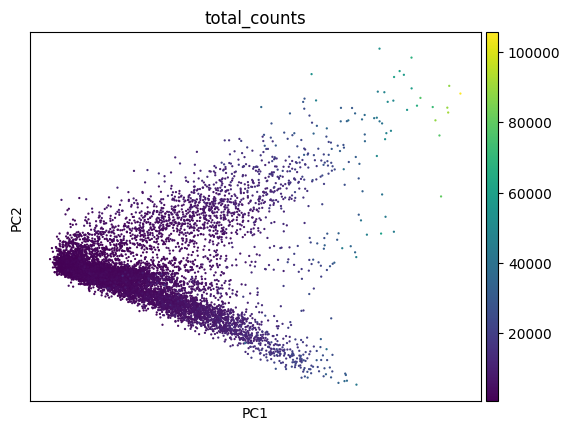

In [38]:
# sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pl.pca(adata, color="total_counts")

### Dimensionality reduction:

2. t-SNE: t refers to t-distribution used. t-SNE is a graph based, non-linear dimensionality reduction technique which projects the high dimensional data onto 2D or 3D components. The method defines a Gaussian probability distribution based on the high-dimensional Euclidean distances between data points. Subsequently, a Student t-distribution is used to recreate the probability distribution in a low dimensional space.

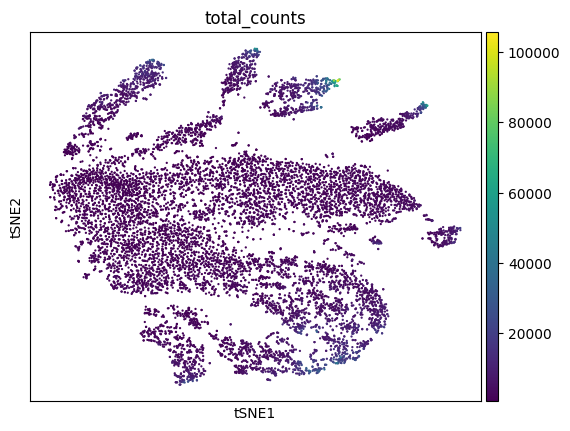

In [39]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color= "total_counts")

3. UMAP: UMAP is a graph based, non-linear dimensionality technique and principally similar to t-SNE. It constructs a high dimensional graph representation of the dataset and optimizes the low-dimensional graph representation to be structurally as similar as possible to the original graph. PCA pre-processing is used to compute the number of neighbors for the initial high dimensional graph. May not always get clustering especially if cellular differences are not present. PCA is produced even before UMAP to reduce the high dimensions.

*neighbors* produces a kNN based lower dimensional graph using dimensionally-reduced dataset. 

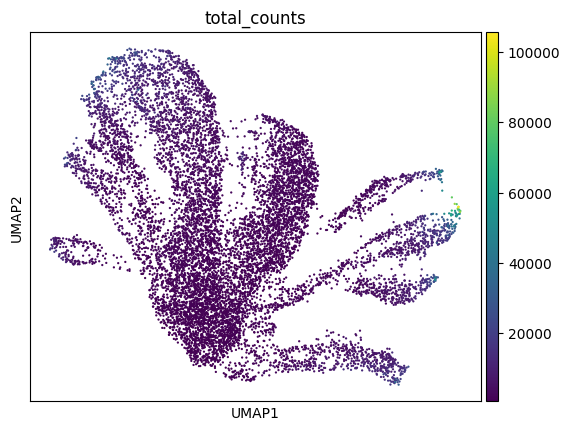

In [40]:
sc.pp.neighbors(adata
                ) 
sc.tl.umap(adata)
sc.pl.umap(adata, color="total_counts")      
# print(adata_top_4000)

### Identification of cellular structures in the scRNA-seq dataset:

Even though we can see certain clusters in the pre-processing steps of our dataset, they have not been distincly separated into actual clusters. Rather than relying on intuition or visual maps, since we are dealing with around 4000 genes for each cell, there are community-detection algorithms for the evaluation of clusters. One of the popular approaches is using the Leiden algorithm. A high-level depiction of the algorithm is provided:

1. Each node (cell) starts as its own cluster.
2. These nodes go through a local moving process where nodes move to optimise a "quality function" such as modularity of the network to measure the connectedness of the various nodes.
3. Then the partitions formed through these nodes produce a cluster-map which further undergoes a refining process where nodes which increase the modularity of ANY community (notice the ANY. It's not the community with highest modularity -- more like it's ANY community that is randomly chosen that increases the modularity function), these nodes are joined with those communities
4. Further the different nodes are aggregated under each of the clusters while still maintaining an optimum level of modularity

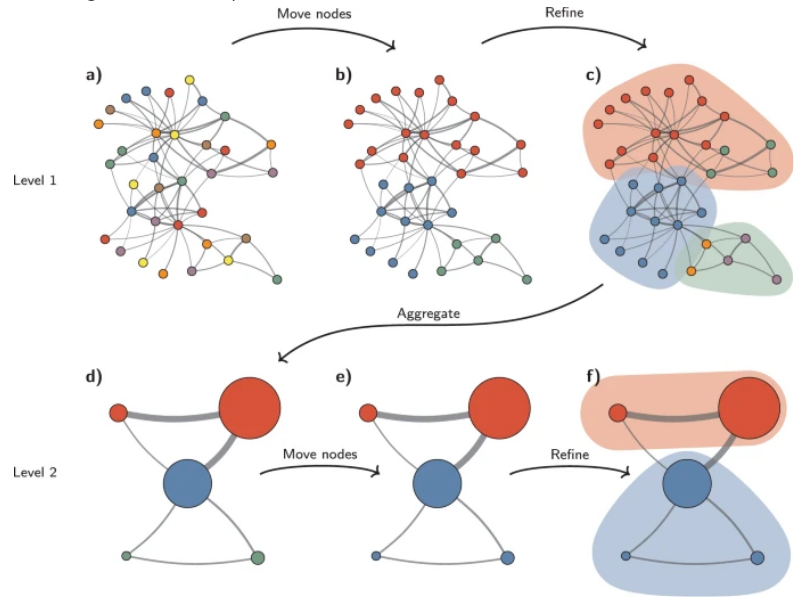

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


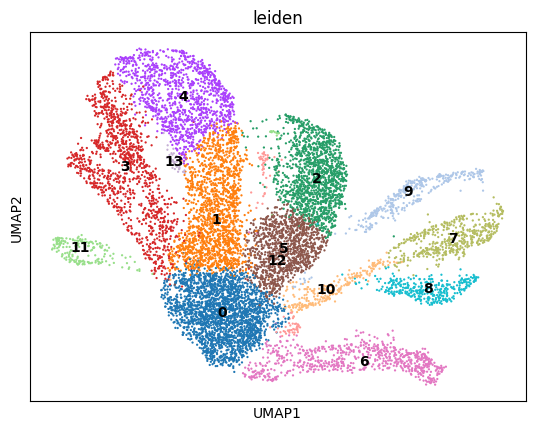

In [41]:
sc.tl.leiden(adata, key_added="leiden", resolution = 0.6)
sc.pl.umap(
    adata,
    color=["leiden"],
    legend_loc="on data",
)

Resolution is a highly important parameter of the clustering algorithm. With higher resolution, more clusters/"communities" are detected.

/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/digemed/Sunaina-single-cell/Project/Project/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


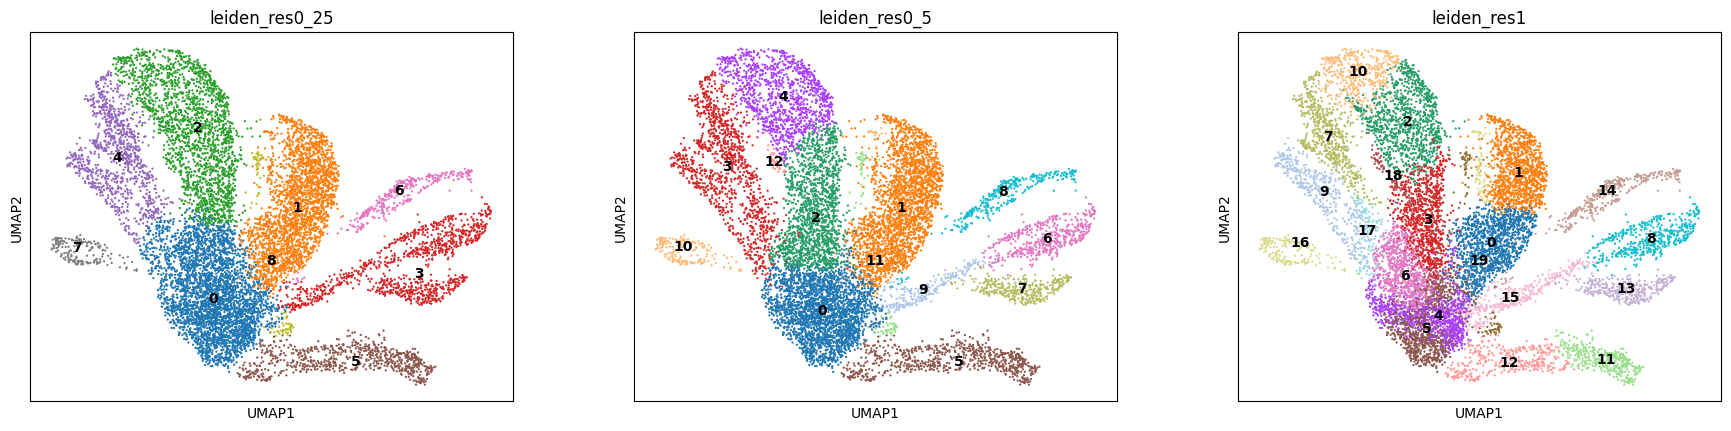

In [42]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

In [43]:
# adata_top_4000.write( "E:/IAS-SRFP-2023/Single_Cell_Portal/" + "adata.h5ad")
adata_top_4000

View of AnnData object with n_obs × n_vars = 11330 × 20095
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_haemoglobin', 'log1p_total_counts_haemoglobin', 'pct_counts_haemoglobin', 'n_genes', 'scDblFinder_score', 'scDblFinder_class'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'haemoglobin', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'deviance'
    uns: 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'soupX_counts', 'log1p_norm', 'analytic_pearson_residuals'
    obsp: 'distances', 'connectivities'